In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#creating path for easier import of data
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Python\Instacart Basket Analysis 01-2025'

In [6]:
#importing data as dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'orders_products_merge_aggcolumns.pkl')) 

In [12]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,median_days_since_order,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


<Axes: xlabel='orders_day_of_the_week'>

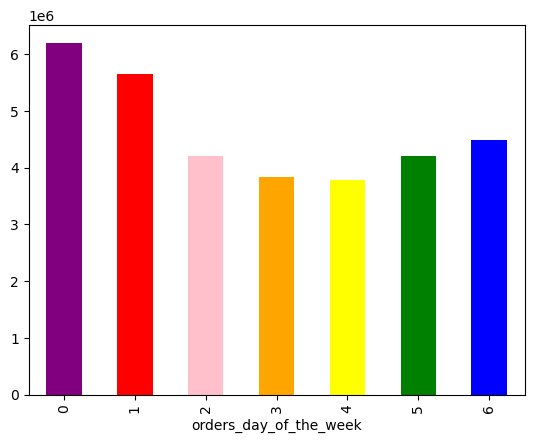

In [28]:
#creating bar chart, using sort index to sort the days of week and color argument to change colors of bars (input colors in bar order)
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

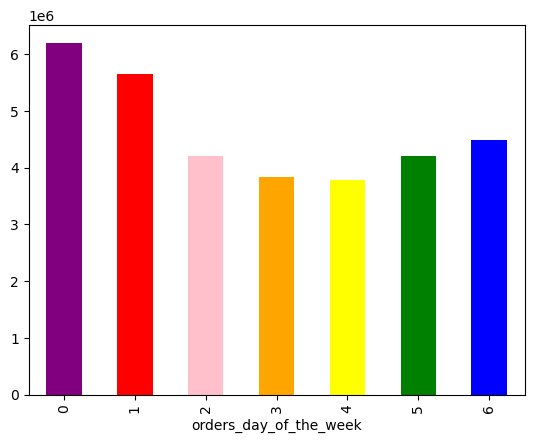

In [34]:
#above only created a preview this will create the actual chart
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [36]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

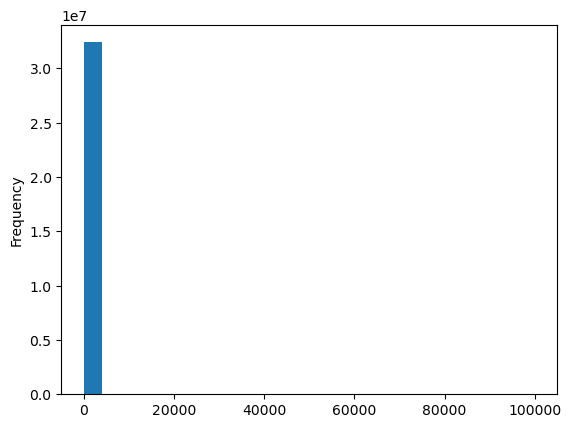

In [38]:
#creating a histogram preview from the prices column, need the argument for number of bins when making a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

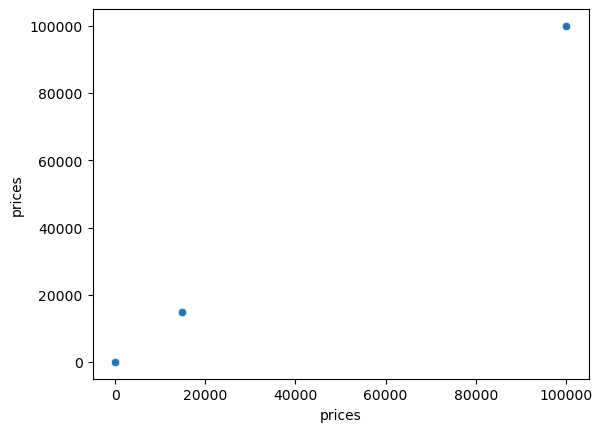

In [41]:
#scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [47]:
#checking for values in prices more than 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,median_days_since_order,customer_frequency
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Busiest days,Average Orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Busiest days,Most Orders,25,Regular customer,351.141618,High Spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Most Orders,25,Regular customer,170.073770,High Spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Least busy,Least busy,Fewest Orders,25,Regular customer,170.073770,High Spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Average Orders,5,New customer,938.031250,High Spender,7.0,Frequent customer


In [45]:
#removing column view limit since i cannot see the prices column
pd.set_option('display.max_columns', None) 

In [49]:
#turning our outliers in NaN so they do not skew our results
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [51]:
ords_prods_merge['prices'].max()

25.0

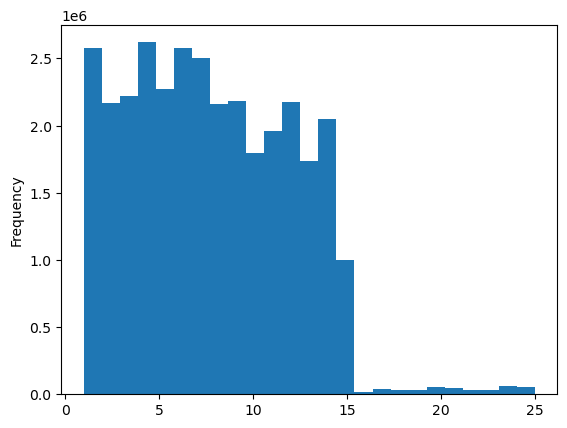

In [53]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

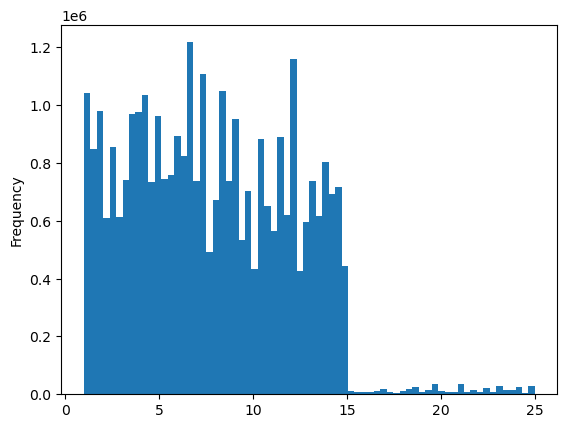

In [55]:
#same thing increasing number of bins
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [57]:
#exporting as image 
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [59]:
#creating a random sample from out df -- create random seed for every value in the df then test if the seed is above or below .7 for a 70/30 split of data 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [61]:
#actually splitting the data ~dev means 'not'dev thus the 30% that was over .7
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [63]:
#checking to make sure it worked using len
len(ords_prods_merge)

32404859

In [65]:
len(big) + len(small)

32404859

In [69]:
#removing all other columns from our subsets for efficiency and simplicity
df_2 = small[['orders_day_of_the_week','prices']]

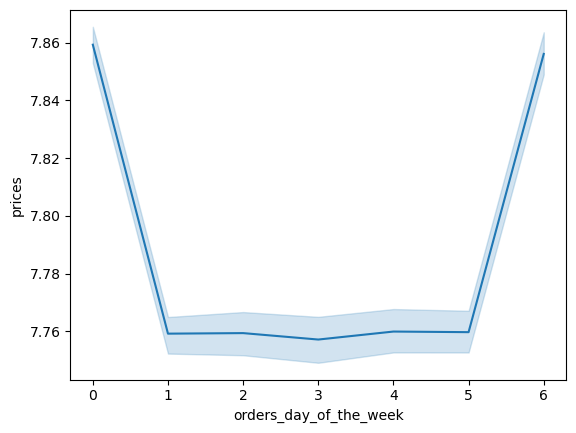

In [73]:
#creating line chat from subset
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

In [75]:
#exporting as image 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))